In [1]:
#Pandas Docs: http://pandas.pydata.org/pandas-docs/stable/
#Tutorials:  10-Minute Video - http://pandas.pydata.org/pandas-docs/stable/10min.html#min
#            Examples/docs - http://pandas.pydata.org/pandas-docs/stable/text.html
#Cheat Sheet:  http://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
#
#Library Purpose: high-performance, easy-to-use data structures and data analysis tools 
#includes: includes file/io conversion to python objects, data cleaning/merging/selection
#tabular/matrix/datafram data structures, time series analysis functions, text data
#
#Additional Exercises:  https://github.com/guipsamora/pandas_exercise

#Note - Using matplot & numpy libraries with pandas examples!
import matplotlib.pylab as plt  #see graph options at: https://matplotlib.org/gallery/index.html
import numpy as np
import pandas as pd

In [2]:
def file_read_csv(path):
    print("Pandas File I/O Example - CSV Read")
    #load csv file into Pandas dataframe object
    data=pd.read_csv(path)
    return data

def file_write_csv(data, path):
    print("Pandas File I/O Example - CSV Write")
    #write Pandas dataframe object to local csv file
    data.to_csv(path)

def file_read_excel(data,path,sheet):
    print("Pandas File I/O Example - Read")
    #load csv file into Pandas dataframe object
    xlsx = pd.ExcelFile(path)
    data = pd.read_excel(xlsx, sheet)
    return data

In [6]:
#import text commentary from CSV file
data = file_read_csv(r"C:\\Python\\Data\\Text_Mining_Sample_CSV.csv") 

#view first 5 rows of dataframe
pd.set_option('display.max_columns', 80) 
#data munging - http://wavedatalab.github.io/datawithpython/munge.html
print(data.head())
print("Number of rows in rows, columns in dataset: {}".format(data.shape))
print("Column names in dataset: {}".format(data.columns))

#write new csv file using dataframe
file_write_csv(data, r"C:\\Python\\Data\\Text_Mining_Sample_CSV2.csv") 

Pandas File I/O Example - CSV Read
        ID  Branch Interview Date Transaction Date Comment Type  \
0  4278642     355      2/24/2015        2/23/2015   Compliment   
1  3329834     311      4/10/2014         4/9/2014   Compliment   
2  4182303     353      1/14/2015        1/13/2015   Compliment   
3  4228554     318       2/4/2015         2/3/2015   Compliment   
4  3860433     351       9/4/2014         9/3/2014   Compliment   

                                             Comment Follow-up  \
0  MY BANK is always good to me. I have banked wi...       NaN   
1  MY BANK is the best for me. They help people w...       NaN   
2  MY BANK has been 100 percent on top on any ban...       NaN   
3  Absolutely no problems with them. Everything h...       NaN   
4  Absolutely. They are efficient, courteous and ...       NaN   

   Satisfaction Rating  
0                   10  
1                    8  
2                    8  
3                    9  
4                    9  
Number of rows 

Matplotlib object


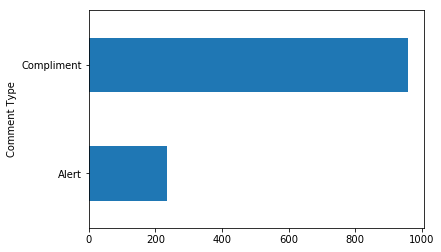

In [8]:
#use pandas/numpy/matplotlib for visualization
print('Matplotlib object')
bar_graph = data.groupby("Comment Type").size().plot(kind='barh')
plt.show()  #show histogram of comment type categories

In [3]:
def data_struct():
    #Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.)
    #Here, data can be many different things: Python Dict, ndarray (numpy), scalar value
    print("Series Example")
    data = {'b' : 1, 'a' : 0, 'c' : 2} #python dict
    s = pd.Series(data)
    print(s) 

    #2-dimensional labeled data structure with columns of potentially different types
    # DataFrame accepts many different kinds of input:  ndarray, dicts, series, another dataframe
    print("DataFrame Example")
    data = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
            'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])} #python dict
    s = pd.DataFrame(data)
    print(s) 
    print("Manipulate DataFrame Example")
    s = pd.DataFrame(d, index=['d', 'b', 'a'], columns=['two', 'three'])
    print(s)  

In [4]:
def data_text():
    s = pd.Series(['A', '3B', 'C', 'Aaba', 'Baca', 3, 'dog', 'cat'])
    print("lowercase series")
    print(s.str.lower())

    print("Length of text elements in series")
    print(s.str.len())

    print("Pattern Matching - Number then Capital Letter")
    pattern = r'[0-9][A-Z]'
    print(s.str.contains(pattern))

#example methods to experiment on :)
#data_struct()     
#data_text()

Pandas File I/O Example - Read
        Date     Open     High      Low    Close      Volume  Adj Close  \
0 2009-04-23  7886.81  8015.36  7762.80  7957.06  6563100000    7957.06   
1 2009-04-22  7964.78  8111.02  7802.46  7886.57  7327860000    7886.57   
2 2009-04-21  7841.73  8027.54  7699.79  7969.56  7436489600    7969.56   
3 2009-04-20  8128.94  8128.94  7801.58  7841.73  6973960000    7841.73   
4 2009-04-17  8125.43  8251.20  8024.92  8131.33  7352009600    8131.33   

  Symbol  log2_open  d1_cls_chg  d5_cls_chg  d10_cls_chg  d30_cls_chg  \
0    DJI   3.896901       70.49     -168.37       119.95      1026.66   
1    DJI   3.901174      -82.99     -143.05        97.01       960.08   
2    DJI   3.894412      127.83       49.38        -6.29      1422.51   
3    DJI   3.910034     -289.60     -216.08      -175.86      1214.79   
4    DJI   3.909846        5.90       47.95       153.25      1536.89   

    d1_vol_chg  d5_cls_chg.1  d10_cls_chg.1  d30_cls_chg.1  d1_cls_pcnt_chg  \


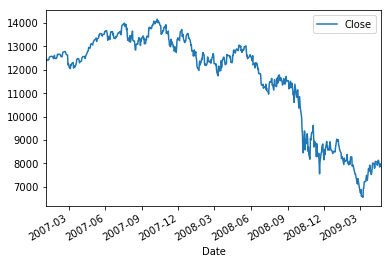

In [7]:
#Graphing Exampele - Time Series- Dow Jones 
#import Dow joens historical data from excel file, then visualize stock market data
data2 = file_read_excel(data, r"C:\\Python\\Data\\indicator_stock_hist.xls",'^DJI') 
print(data2.head())
#aggregate/select data from dataset:  http://wavedatalab.github.io/datawithpython/aggregate.html
data3 = data2[['Date', 'Close']]
print(data3.head())
#return records with year >= 2007
data4 = data3[(data3['Date'] > '2007-01-01' )]
#create time series line chart that plots Dow Jones closing values
y = data4['Close']
x = pd.to_datetime(data4['Date'])   #iterate list to transfor dates for graphical use
data5 = pd.DataFrame({'Close':y, 'Date':x}).set_index(x) 
data5.plot(kind='line')
plt.show()
#Time series functions:  http://wavedatalab.github.io/datawithpython/timeseries.html